<a href="https://colab.research.google.com/github/PowerfulWorld/Alien/blob/main/pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [192]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import torchvision as tv
import pandas as pd
from tqdm import tqdm


In [193]:
trans=tv.transforms.Compose([
    tv.transforms.ToTensor()
])

In [194]:
ds_mnist=tv.datasets.MNIST('./datasets',download=True,transform=trans)

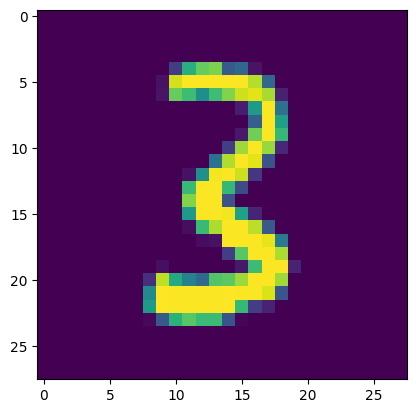

In [195]:
plt.imshow(ds_mnist[50000][0].numpy()[0])

In [196]:
batch_size=16
dataloader = torch.utils.data.DataLoader(ds_mnist,batch_size=batch_size,shuffle=True,num_workers = 1, drop_last = True)

In [197]:
for img,label in dataloader:
  print(img.shape)
  break

torch.Size([16, 1, 28, 28])


In [199]:
class Neural_numbers(nn.Module):
  def __init__(self):
    super().__init__()
    self.flat=nn.Flatten()
    self.linear1=nn.Linear(28*28,100)
    self.linear2=nn.Linear(100,10)
    self.act=nn.ReLU()
  def forward(self,x):
    out= self.flat(x)
    out=self.linear1(out)
    out=self.act(out)
    out=self.linear2(out)
    return out

In [200]:
model=Neural_numbers()

In [201]:
loss_fn=nn.CrossEntropyLoss()

In [202]:
optimizer=torch.optim.SGD(model.parameters(),lr=1e-3,momentum=0.9)

In [203]:
def accuracy(pred,label):
  answer=nn.functional.softmax(pred.detach()).numpy().argmax(1) == label.numpy().argmax(1)
  return answer.mean()

In [143]:
epochs= 10
for  epoch in range(epochs):
    loss_val=0
    acc_val=0
    for img,label in (pbar:= tqdm(dataloader)):
      optimizer.zero_grad()
      label=nn.functional.one_hot(label,10).float()
      pred=model(img)
      loss=loss_fn(pred,label)
      loss.backward()
      loss_item=loss.item()
      loss_val+=loss_item
      acc_current=accuracy(pred,label)
      acc_val+=acc_current
      optimizer.step()
      pbar.set_description(f'loss: {loss_item:.4f}\taccuracy: {acc_current:.3f}')
    print(loss_val/len(dataloader))
    print(acc_val/len(dataloader))


  0%|          | 0/3750 [00:00<?, ?it/s]<ipython-input-135-06cea9516cc1>:2: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  answer=nn.functional.softmax(pred.detach()).numpy().argmax(1) == label.numpy().argmax(1)
loss: 0.0678	accuracy: 0.938: 100%|██████████| 3750/3750 [00:43<00:00, 86.75it/s]


0.06923479860021423
0.9810833333333333


loss: 0.0250	accuracy: 1.000: 100%|██████████| 3750/3750 [00:41<00:00, 89.39it/s]


0.06625041505554691
0.9814333333333334


loss: 0.0660	accuracy: 1.000: 100%|██████████| 3750/3750 [00:44<00:00, 85.06it/s] 


0.06347221056205841
0.9826333333333334


loss: 0.0058	accuracy: 1.000: 100%|██████████| 3750/3750 [00:41<00:00, 90.46it/s]


0.06079606544501148
0.9831


loss: 0.0201	accuracy: 1.000: 100%|██████████| 3750/3750 [00:42<00:00, 88.50it/s] 


0.058513389248680325
0.9839166666666667


loss: 0.0244	accuracy: 1.000: 100%|██████████| 3750/3750 [00:41<00:00, 90.73it/s]


0.05627212456000658
0.98465


loss: 0.0096	accuracy: 1.000: 100%|██████████| 3750/3750 [00:42<00:00, 88.42it/s]


0.05399871439527099
0.9855833333333334


loss: 0.0540	accuracy: 1.000: 100%|██████████| 3750/3750 [00:40<00:00, 91.88it/s]


0.05213956307657063
0.98615


loss: 0.0320	accuracy: 1.000: 100%|██████████| 3750/3750 [00:41<00:00, 89.52it/s]


0.05023655897736705
0.9869


loss: 0.0414	accuracy: 1.000: 100%|██████████| 3750/3750 [00:40<00:00, 93.23it/s] 

0.048547394739673476
0.9871166666666666


In [214]:
accuracy(pred,label)

<ipython-input-203-06cea9516cc1>:2: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  answer=nn.functional.softmax(pred.detach()).numpy().argmax(1) == label.numpy().argmax(1)


AxisError: axis 1 is out of bounds for array of dimension 1

In [215]:
img=cv2.imread('13.png',cv2.IMREAD_GRAYSCALE)
img=np.expand_dims(img,axis=0)
img=np.expand_dims(img,axis=0)
img=img.astype(np.float32)/255.0

In [216]:
t_img=torch.from_numpy(img)
n_p=model(t_img)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x1 and 784x100)

In [213]:
nn.functional.softmax(n_p).detach().numpy().argmax()

<ipython-input-213-de3adc8ab2a1>:1: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  nn.functional.softmax(n_p).detach().numpy().argmax()


8